In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
plt.style.use('default')

import sys
sys.path.append("/cluster/home/yhgong/")

from python.modules.features.calculate_data.utilities.velocity_filtering import *

In [2]:
simFile = SimFileModel(
    simPath="/lfs/data/yhgong/productionRun/mergerAGN/MHD/Cooling_Feedback_ContiRandom15",
    hdf5FilePrefix="perseus_merger_hdf5_plt_cnt",
    fileSterMyr=1
)

yt : [INFO     ] 2024-05-08 15:27:36,685 Particle file found: perseus_merger_hdf5_part_3000
yt : [INFO     ] 2024-05-08 15:27:36,737 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-08 15:27:36,738 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-08 15:27:36,739 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-08 15:27:36,740 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-08 15:27:36,741 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-08 15:27:40,895 xlim = -462851637144348748939264.000000 462851637144348748939264.000000
yt : [INFO     ] 2024-05-08 15:27:40,899 ylim = -462851637144348748939264.000000 462851637144348748939264.000000
yt : [INFO     ] 2024-05-08 15:27:40,901 xlim = -462851637144348748939264.000000 462851637144348748939264.000000
yt : [INFO     ] 2024-05-08 15:27:40,901 ylim =


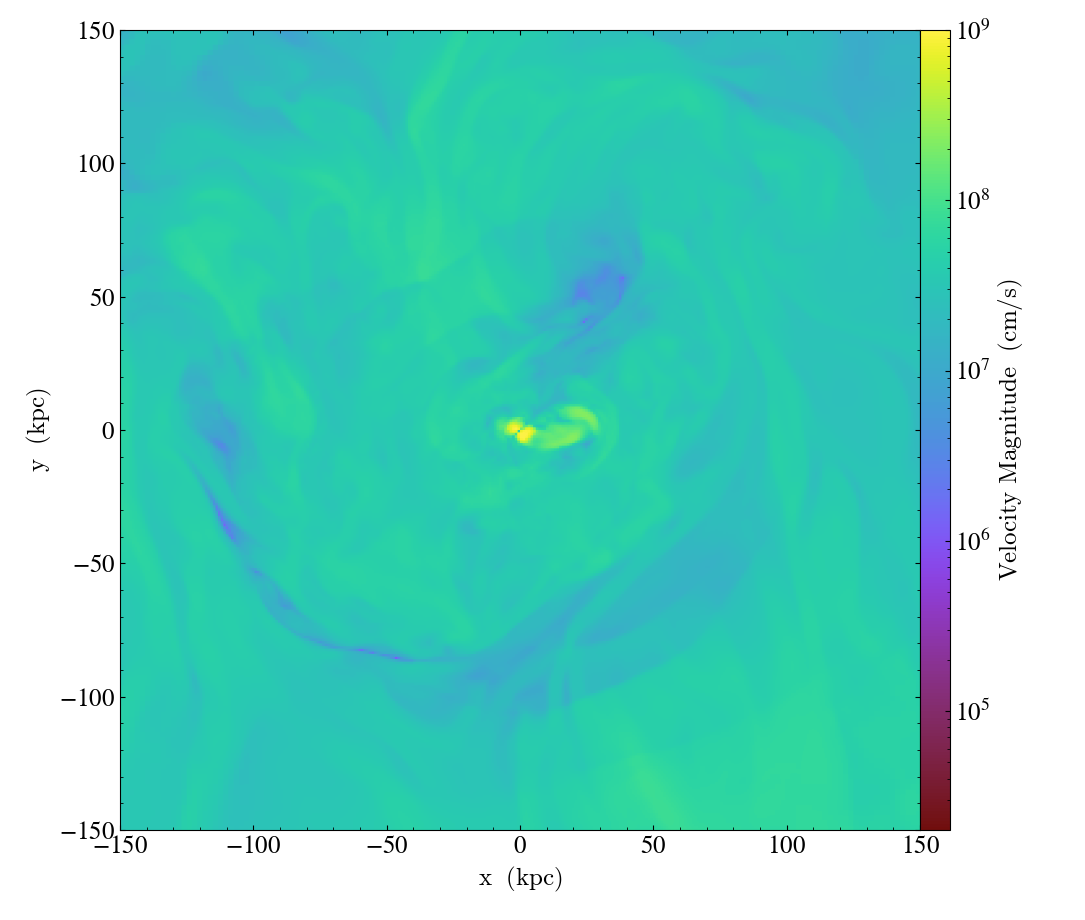

In [10]:
ds = yt.load(simFile.getHdf5Path(timeMyr=3000))
slicePlot = yt.SlicePlot(
    ds=ds,
    normal="z",
    fields=("gas", "velocity_magnitude"),
    width=yt.YTQuantity(300, "kpc"),
).set_zlim(("gas", "velocity_magnitude"), 2e4, 1e9)
slicePlot.show()

In [3]:
result = VelocityFiltering().setInputs(
        mode=VelocityFilteringMode.BulkTurb,
        simFile=simFile,
        calculationInfo=VelocityFilteringCalculationInfoModel(
            timeMyr=3000,
            rBoxKpc=150,
            bulkTurbFilteringMaxScale=40
        )
    ).getData2d("z")


yt : [INFO     ] 2024-05-10 17:34:25,246 Particle file found: perseus_merger_hdf5_part_3000
yt : [INFO     ] 2024-05-10 17:34:25,312 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-10 17:34:25,314 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-10 17:34:25,316 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-10 17:34:25,317 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-10 17:34:25,318 Parameters: cosmological_simulation   = 0
IDL 8.8.0 (linux x86_64 m64).
(c) 2020, Harris Geospatial Solutions, Inc.

Licensed for use by: National Tsing Hua University
License: 351191


       4
       5
       6
       7
       8
       9
      10
      11
      12
      13
      14
      15
      16
      17
      18
      19
      20
      21
      22
      23
      24
      25
      26
      27
      28
      29
      30
      31
      32
      33
      34
      35
      36
      37
      38
      39
      40
       4
       5
       6
       7
       8
       9
      10
      11
      12
      13
      14
      15
      16
      17
      18
      19
      20
      21
      22
      23
      24
      25
      26
      27
      28
      29
      30
      31
      32
      33
      34
      35
      36
      37
      38
      39
      40
       4
       5
       6
       7
       8
       9
      10
      11
      12
      13
      14
      15
      16
      17
      18
      19
      20
      21
      22
      23
      24
      25
      26
      27
      28
      29
      30
      31
      32
      33
      34
      35
      36
      37
      38
      39
      40


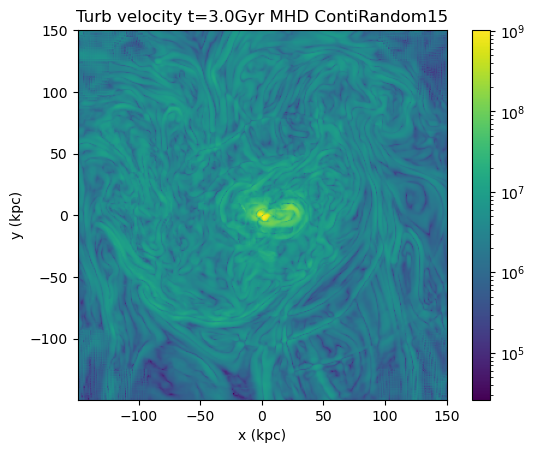

In [4]:
# Updated
from matplotlib import colors

axisUnit = result.horizontalAxis[1].unit.to_string()
plt.imshow(
    np.flipud(result.turbVtotal.value), 
    norm=colors.LogNorm(),
    extent=[
        result.horizontalAxis[1].value[0], result.horizontalAxis[1].value[-1],
        result.verticalAxis[1].value[0], result.verticalAxis[1].value[-1],
    ]
)
plt.colorbar()
plt.title("Turb velocity t=3.0Gyr MHD ContiRandom15")
plt.xlabel(f"{result.horizontalAxis[0]} ({axisUnit})")
plt.ylabel(f"{result.verticalAxis[0]} ({axisUnit})")
plt.show()

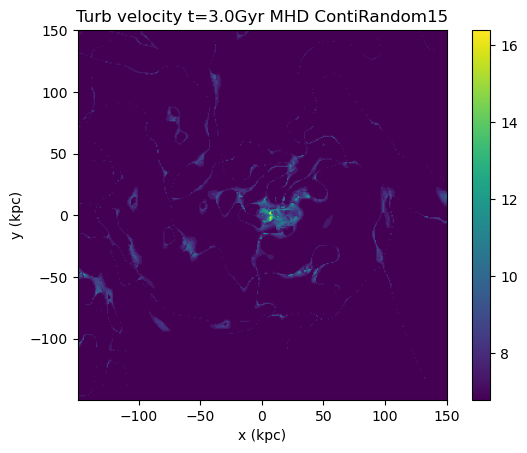

In [7]:
# Updated
from matplotlib import colors

axisUnit = result.horizontalAxis[1].unit.to_string()
plt.imshow(
    np.flipud(result.scale.value), 
    extent=[
        result.horizontalAxis[1].value[0], result.horizontalAxis[1].value[-1],
        result.verticalAxis[1].value[0], result.verticalAxis[1].value[-1],
    ]
)
plt.colorbar()
plt.title("Turb velocity t=3.0Gyr MHD ContiRandom15")
plt.xlabel(f"{result.horizontalAxis[0]} ({axisUnit})")
plt.ylabel(f"{result.verticalAxis[0]} ({axisUnit})")
plt.show()

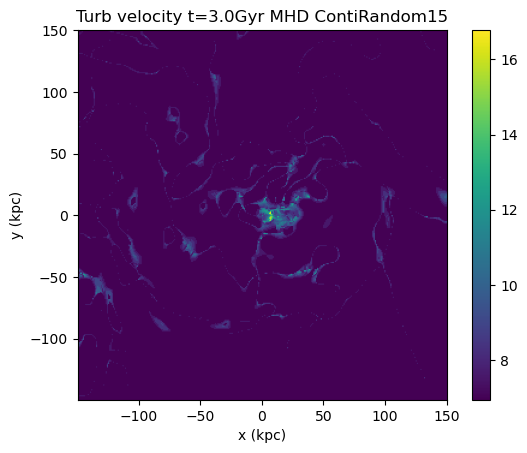

In [8]:
# Updated
from matplotlib import colors

axisUnit = result.horizontalAxis[1].unit.to_string()
plt.imshow(
    np.flipud(result.scaleCells), 
    extent=[
        result.horizontalAxis[1].value[0], result.horizontalAxis[1].value[-1],
        result.verticalAxis[1].value[0], result.verticalAxis[1].value[-1],
    ]
)
plt.colorbar()
plt.title("Turb velocity t=3.0Gyr MHD ContiRandom15")
plt.xlabel(f"{result.horizontalAxis[0]} ({axisUnit})")
plt.ylabel(f"{result.verticalAxis[0]} ({axisUnit})")
plt.show()

In [29]:
sliceData = slicePlot.data_source.to_frb((300, "kpc"), 300)
velData = np.array(sliceData[("gas", "velocity_magnitude")])

yt : [INFO     ] 2024-05-08 08:33:58,611 Making a fixed resolution buffer of (('gas', 'velocity_magnitude')) 300 by 300


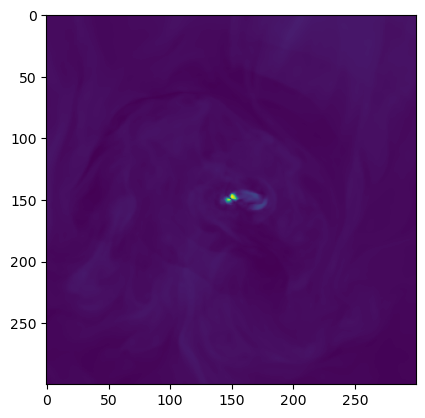

In [30]:
fig, ax = plt.subplots()
ax.imshow(velData)

In [3]:
ds = yt.load(simFile.getHdf5Path(timeMyr=3000))
cube = ds.covering_grid(
    level=6,
    left_edge=yt.YTArray([-20.,-20.,-20.], "kpc"), 
    dims=[40,40,40], 
    fields=("gas", "velocity_x")
)

yt : [INFO     ] 2024-05-08 14:40:01,512 Particle file found: perseus_merger_hdf5_part_3000
yt : [INFO     ] 2024-05-08 14:40:01,618 Parameters: current_time              = 9.467103730227557e+16
yt : [INFO     ] 2024-05-08 14:40:01,619 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-08 14:40:01,621 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-08 14:40:01,622 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-08 14:40:01,624 Parameters: cosmological_simulation   = 0
